# **NLP Projects with Hugging Face**

**Welcome! In this project, you will be learning how to perform common Natural Language Processing (NLP) tasks using Hugging Face. Some of these tasks include:**

- Sentiment analysis (i.e. categorizing text as negative or positive);
- Text embedding (i.e. transforming a piece of text into a numerical,n-dimensional vector, representation);
- Semantic search (i.e. matching a query with the most appropriate result based on embeddings);
and more!

The dataset comes from "Rent the Runway" link and is comprised of user reviews on clothing items, their ratings on fit, and other metadata about the user (i.e. gender, height, size, age, reason for renting) and the item (i.e. category). It is a nice mixture of data types, but most importantly, lots of text!

In order to be successful, you should have:

**Intermediate knowledge of Python**

- list comprehension
- for loops and while loops
- installing packages
- creating and using functions
- using NumPy and Pandas
- Basic understanding of NLP

**What it is**

- Data preparation steps and why they're important
- Familiarity, though not necessarily expert proficiency, in some NLP tasks
- Brief usage of Hugging Face

**SETUP**

For this project, we will need several Python packages:

pandas
numpy
datetime
re
string
matplotlib.pyplot
seaborn
transformers
sentence_transformers
These packages will help us with the data preprocessing steps, visualization, and, of course, NLP tasks using Hugging Face (i.e. transformers and sentence_transformers).

In [1]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=3a1f3e94ea620ec70c9f204aed8e501054754a16e9eb70deb7f4cb0507d54b55
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [2]:
pip install ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00


**Importation of necessary libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import string
from transformers import pipeline
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import semantic_search
from IPython.display import display,Markdown

In [5]:
data = pd.read_json('/content/drive/MyDrive/data/renttherunway_final_data (1).json',lines=True,convert_dates=['review_date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fit             192544 non-null  object        
 1   user_id         192544 non-null  int64         
 2   bust size       174133 non-null  object        
 3   item_id         192544 non-null  int64         
 4   weight          162562 non-null  object        
 5   rating          192462 non-null  float64       
 6   rented for      192534 non-null  object        
 7   review_text     192544 non-null  object        
 8   body type       177907 non-null  object        
 9   review_summary  192544 non-null  object        
 10  category        192544 non-null  object        
 11  height          191867 non-null  object        
 12  size            192544 non-null  int64         
 13  age             191584 non-null  float64       
 14  review_date     192544 non-null  dat

**Text Preprocessing**

- We'll be performing preprocessing before modelling and without preprocessing to figure out whether there'll be a difference in the sentiment classification.
- Examining a few review columns to get an idea of the text, any patterns etc.

In [ ]:
data['review_text'].head(5).values

array(["An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
       'I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event. ',
       'This hugged in all the right places! It was a perfect dress for my event and I received so many compliments on it. Not to mention customer service was great getting this to me in less than 24 hours!',
       "I rented this for my company's black tie awards banquet.  I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.)  I would describe the color as more rose gold than yellow gold.  I have blonde hair and fair skin, and the color was very flattering.  This i

Findings:
- Our reviews contain special characters, punctuation marks, digits, white space and are both in lower and upper case.
- We'll carry out some preprocessing.

In [7]:
# Special characters and numbers

data['cleaned_review'] = data['review_text'].str.replace(r"\/","",regex=True)

# Removing punctuation

data['cleaned_review'] = data['cleaned_review'].str.translate(string.punctuation)

# Removing digits

data['cleaned_review'] = data['cleaned_review'].str.replace(r"\d+","",regex=True)

# Removing white space

data['cleaned_review'] = data['cleaned_review'].str.replace(r"\s{2,}","",regex=True)

# Lowercase

data['cleaned_review'] = data['cleaned_review'].str.lower()


In [ ]:
data['cleaned_review']

0         an adorable romper! belt and zipper were a lit...
1         i rented this dress for a photo shoot. the the...
2         this hugged in all the right places! it was a ...
3         i rented this for my company's black tie award...
4         i have always been petite in my upper body and...
                                ...                        
192539                                    fit like a glove!
192540    the pattern contrast on this dress is really s...
192541    like the other dvf wraps, the fit on this is f...
192542    this dress was perfection.it looked incredible...
192543    this dress was wonderful! i had originally pla...
Name: cleaned_review, Length: 192544, dtype: object

**Sentiment Analysis**

In [11]:
# We'll grab the first 100 rows of the data

model_df = data.iloc[:1000]

In [9]:
model = 'distilbert-base-uncased-finetuned-sst-2-english'

# instantiate the pipeline object

sa = pipeline("sentiment-analysis",model=model)

# Running the model

sent_output = sa(list(model_df['cleaned_review']))

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [19]:
# Grabbing the labels and scores

for i, s in enumerate(sent_output):
    model_df.loc[i, 'sentiment_label'] = s['label']
    model_df.loc[i, 'sentiment_score'] = s['score']


<ipython-input-19-670ff523e289>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.loc[i, 'sentiment_label'] = s['label']
<ipython-input-19-670ff523e289>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.loc[i, 'sentiment_score'] = s['score']


**Visualizing the sentiment score distribution**

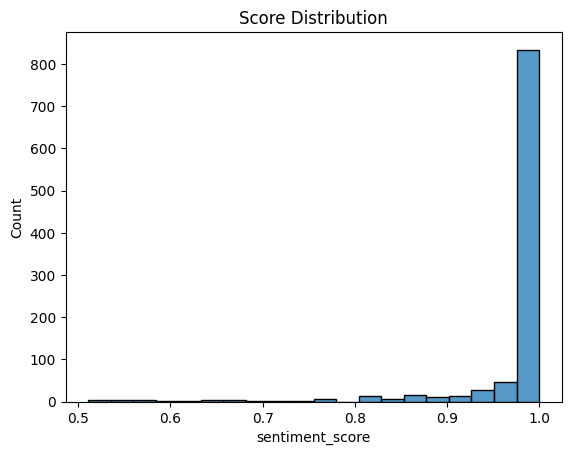

In [ ]:
sns.histplot(data=model_df,x='sentiment_score',bins=20)
plt.title('Score Distribution')
plt.show()

Findings:
- Our model seems to be very confident in it's sentiment classification of the reviews.

**Sentiment over the years**

In [ ]:
# Grabbing the year column

model_df['year'] = model_df['review_date'].dt.year

<ipython-input-32-59b5476f0238>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['year'] = model_df['review_date'].dt.year


In [ ]:
viz_df = model_df.groupby(['year','sentiment_label'],as_index=False)['user_id'].count().rename(columns={'user_id':'count'})

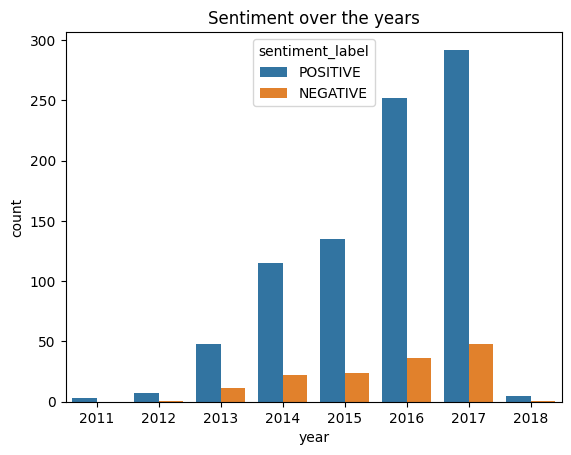

In [ ]:
sns.barplot(data=viz_df,x='year',y='count',hue='sentiment_label')
plt.title('Sentiment over the years')
plt.show()

**Does text cleaning matter**

In [ ]:
model_df.head(2)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,cleaned_review,sentiment_label,sentiment_score,year
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,2016-04-20,an adorable romper! belt and zipper were a lit...,POSITIVE,0.999646,2016
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,2013-06-18,i rented this dress for a photo shoot. the the...,POSITIVE,0.998757,2013


In [ ]:
sent_output_2 = sa(list(model_df['review_text']))

In [ ]:
model_df['sentiment_label_2'] = [s['label'] for s in sent_output_2]
model_df['sentiment_score_2'] = [s['score'] for s in sent_output_2]

<ipython-input-50-8f586dc92b70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['sentiment_label_2'] = [s['label'] for s in sent_output_2]
<ipython-input-50-8f586dc92b70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['sentiment_score_2'] = [s['score'] for s in sent_output_2]


**Visualizing the difference**

In [ ]:
display(pd.crosstab(model_df['sentiment_label'],model_df['sentiment_label_2']))

sentiment_label_2,NEGATIVE,POSITIVE
sentiment_label,,
NEGATIVE,138,5
POSITIVE,9,848


- Not much difference in the model classifications with only about 14 different classifications.
- Transformer model handle raw text data quite well.

# **Embeddings**

In [ ]:
# We'll perform emebeddings on the 'rented for' column

model_id = "sentence-transformers/all-MiniLM-L6-v2"

model = SentenceTransformer(model_id)

embeddings = model.encode(list(model_df['rented for']))

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
embeddings.shape

(1000, 384)

**Dimensionality reduction**

In [ ]:
from sklearn.manifold import TSNE

# instantiating a new tsne object

tsne = TSNE(n_components = 2,perplexity = 15,random_state = 42,init = 'random',learning_rate = 200)

# Generate the tsne dimensions using the saved embeddings

tsne_dims = tsne.fit_transform(embeddings)

In [ ]:
# Confirming the output

tsne_dims.shape

(1000, 2)

In [ ]:
# Visualizing the result

tsne_dims[0]

array([49.92541 , 64.757515], dtype=float32)

In [ ]:
model_df['x'] = [x for x,y in tsne_dims]
model_df['y'] = [y for x,y in tsne_dims]

<ipython-input-61-b8eee79f6c9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['x'] = [x for x,y in tsne_dims]
<ipython-input-61-b8eee79f6c9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['y'] = [y for x,y in tsne_dims]


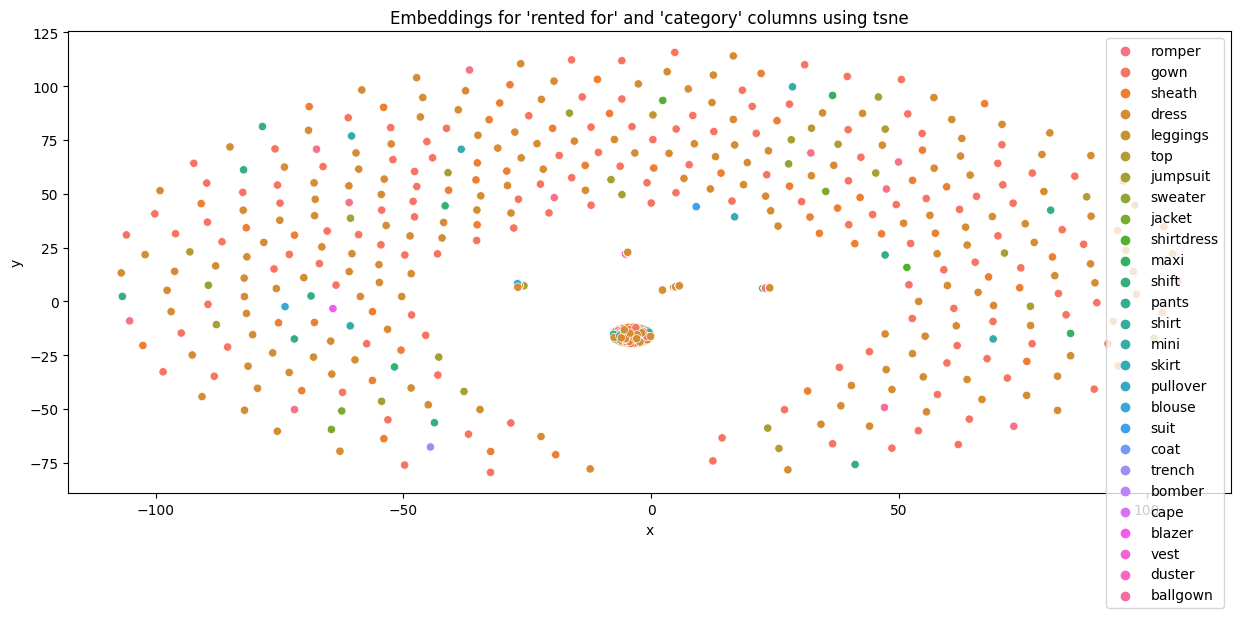

In [ ]:
# Visualizing the results
plt.figure(figsize=(15,6))
sns.scatterplot(data=model_df,x='x',y='y',hue='category')
plt.title("Embeddings for 'rented for' and 'category' columns using tsne")
plt.legend()
plt.show()

# **Semantic Search**

In [ ]:
# Define query

query = 'A lovely and fantastic dress'

# Embed query

query_embed = model.encode(query,convert_to_tensor = True)

# Calculate similarity between query and item embeddings

hits = semantic_search(query_embed, embeddings, top_k = 3)

In [ ]:
hits

[[{'corpus_id': 18, 'score': 0.42916131019592285},
  {'corpus_id': 11, 'score': 0.42916131019592285},
  {'corpus_id': 4, 'score': 0.42916131019592285}]]

In [ ]:
hits[0]

[{'corpus_id': 18, 'score': 0.42916131019592285},
 {'corpus_id': 11, 'score': 0.42916131019592285},
 {'corpus_id': 4, 'score': 0.42916131019592285}]

In [ ]:
print("Query: ",query)
for i in hits[0]:
  idx = i['corpus_id']
  print(
      "Item ID: ",model_df.iloc[idx]['user_id'],
        "Category: ",model_df.iloc[idx]['category'],
         "Rented For: ",model_df.iloc[idx]['rented for'],
         "Review: ",model_df.iloc[idx]['review_summary']
         )

Query:  A lovely and fantastic dress
Item ID:  649288 Category:  dress Rented For:  wedding Review:  Semi-formal wedding
Item ID:  533900 Category:  dress Rented For:  wedding Review:  Stunning dress, perfect for a New Year's Eve wedding!
Item ID:  151944 Category:  gown Rented For:  wedding Review:  Was in love with this dress !!!


In [ ]:
model_df[model_df['user_id'] == 649288]

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,cleaned_review
18,fit,649288,34b,172027,115lbs,8.0,wedding,This is a pretty and fun dress with vibrant co...,petite,Semi-formal wedding,dress,"5' 3""",8,28.0,2017-07-03,this is a pretty and fun dress with vibrant co...


**Generate New Marketing Material**

In [ ]:
# Generate new text based on a prompt

# Instantiate the pipeline for generating text

generator = pipeline(model='gpt2')

# Pre-defined prompt

prompt = 'Our new stock with the best textures and colors'

# Use the prompt as input to the Generator to return output

output = generator(prompt,num_return_sequences=1, return_full_text = False)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
# Print out the generated text
print(output[0]['generated_text'])

 for the PPCG® M3R. This looks just like a normal CZK model with the best textures, and a nice look around the back and sides. All black paint and a large
